In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold 
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'],errors='coerce')
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [5]:
churn.isnull().sum().sort_values(ascending = False)/len(churn)*100

TotalCharges        0.156183
Churn               0.000000
OnlineSecurity      0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
customerID          0.000000
dtype: float64

In [6]:
churn['TotalCharges'].fillna(value = churn['TotalCharges'].median(), inplace=True)
churn['TotalCharges'].isnull().sum()

0

In [7]:
converttoBinary={
    'Yes' : 1,
    'No' : 0,
    'No internet service' : 0,
    'No phone service' : 0
}

replaceFeatureVal = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn', 'OnlineSecurity', 
                    'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in replaceFeatureVal:
    churn[i] = churn[i].map(converttoBinary)

In [8]:
churn['MultipleLines'] = np.where(churn.MultipleLines == 'Yes', 1, 0)
churn['InternetDSL'] = np.where(churn.InternetService == 'DSL', 1, 0)
churn['InternetFiber'] = np.where(churn.InternetService == 'Fiber optic', 1, 0)
churn['Female'] = np.where(churn.gender == 'Female', 1, 0)
churn['OneYrContract'] = np.where(churn.Contract == 'One year', 1, 0)
churn['TwoYrContract'] = np.where(churn.Contract == 'Two year', 1, 0)

In [9]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetDSL,InternetFiber,Female,OneYrContract,TwoYrContract
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,1,0,0


In [10]:
x = churn.drop(['customerID','gender','InternetService','Contract','PaymentMethod','Churn'], axis = 1)
y = churn['Churn']

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int32
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
PaperlessBilling    7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
InternetDSL         7043 non-null int32
InternetFiber       7043 non-null int32
Female              7043 non-null int32
OneYrContract       7043 non-null int32
TwoYrContract       7043 non-null int32
dtypes: float64(2), int32(6), int64(12)
memory usage: 935.5 KB


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

In [13]:
from keras.utils import to_categorical
y = np.array(y)
y = to_categorical(y)
y.shape

Using TensorFlow backend.


(7043, 2)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
70/70 [==============================] - 0s 2ms/step - loss: 0.6772 - acc: 0.5643
Epoch 2/5
70/70 [==============================] - 0s 29us/step - loss: 0.6742 - acc: 0.5500
Epoch 3/5
70/70 [==============================] - 0s 14us/step - loss: 0.6714 - acc: 0.5786
Epoch 4/5
70/70 [==============================] - 0s 28us/step - loss: 0.6688 - acc: 0.5786
Epoch 5/5
6973/6973 [==============================] - 0s 7us/step
Epoch 1/5
704/704 [==============================] - 0s 13us/step - loss: 0.6212 - acc: 0.7301
Epoch 2/5
704/704 [==============================] - 0s 18us/step - loss: 0.6040 - acc: 0.7386
Epoch 3/5
704/704 [==============================] - 0s 20us/step - loss: 0.5944 - acc: 0.7386
Epoch 4/5
704/704 [==============================] - 0s 16us/step - loss: 0.5885 - acc: 0.7386
Epoch 5/5
6339/6339 [==============================] - 0s 6us/step
Epoch 1/5
1408/1408 

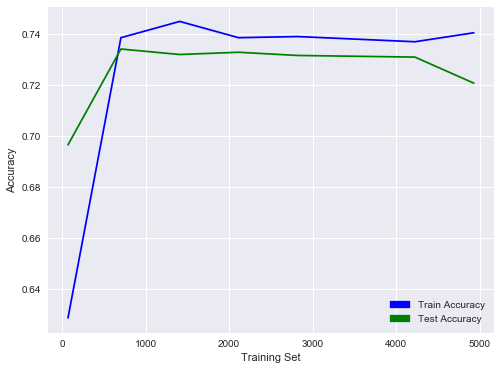

In [16]:
import matplotlib.patches as mpatches
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with sigmoid activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
5070/5070 [==============================] - 0s 16us/step - loss: 0.5584 - acc: 0.7406
Epoch 2/2
1268/1268 [==============================] - 0s 9us/step
Epoch 1/2
5070/5070 [==============================] - 0s 13us/step - loss: 0.5623 - acc: 0.7353
Epoch 2/2
1268/1268 [==============================] - 0s 13us/step
Epoch 1/2
5070/5070 [==============================] - 0s 17us/step - loss: 0.5596 - acc: 0.7363
Epoch 2/2
1268/1268 [==============================] - 0s 7us/step
Epoch 1/2
5071/5071 [==============================] - 0s 12us/step - loss: 0.5570 - acc: 0.7375
Epoch 2/2
1267/1267 [==============================] - 0s 8us/step
Epoch 1/2
5071/5071 [==============================] - 0s 10us/step - loss: 0.5566 - acc: 0.7359
Epoch 2/2
1267/1267 [==============================] - 0s 7us/step
The accuracy of the neural net with sigmoid activation function is 73.71%


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [19]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
70/70 [==============================] - 0s 1ms/step - loss: 6.7136 - acc: 0.2571
Epoch 2/5
70/70 [==============================] - 0s 29us/step - loss: 6.6380 - acc: 0.2857
Epoch 3/5
70/70 [==============================] - 0s 29us/step - loss: 5.6136 - acc: 0.3643
Epoch 4/5
70/70 [==============================] - 0s 29us/step - loss: 5.3242 - acc: 0.3714
Epoch 5/5
6973/6973 [==============================] - 0s 6us/step
Epoch 1/5
704/704 [==============================] - 0s 16us/step - loss: 4.5767 - acc: 0.4446
Epoch 2/5
704/704 [==============================] - 0s 14us/step - loss: 0.9341 - acc: 0.6669
Epoch 3/5
704/704 [==============================] - 0s 14us/step - loss: 0.6539 - acc: 0.7152
Epoch 4/5
704/704 [==============================] - 0s 16us/step - loss: 0.6220 - acc: 0.7244
Epoch 5/5
6339/6339 [==============================] - 0s 8us/step
Epoch 1/5
1408/1408 [==============================] - 0s 15us/step - loss: 0.5937 - acc: 0.7472
Epoch 2/5
1408/140

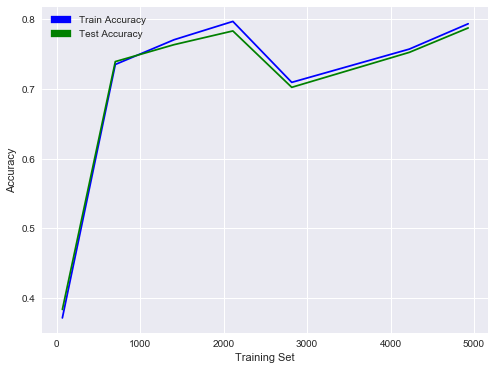

In [20]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Tanh activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
5070/5070 [==============================] - 0s 12us/step - loss: 0.4581 - acc: 0.7959
Epoch 2/2
1268/1268 [==============================] - 0s 7us/step
Epoch 1/2
5070/5070 [==============================] - 0s 14us/step - loss: 0.4518 - acc: 0.7928
Epoch 2/2
1268/1268 [==============================] - 0s 7us/step
Epoch 1/2
5070/5070 [==============================] - 0s 11us/step - loss: 0.4534 - acc: 0.8001
Epoch 2/2
1268/1268 [==============================] - 0s 6us/step
Epoch 1/2
5071/5071 [==============================] - 0s 11us/step - loss: 0.4631 - acc: 0.7970
Epoch 2/2
1267/1267 [==============================] - 0s 7us/step
Epoch 1/2
5071/5071 [==============================] - 0s 12us/step - loss: 0.5038 - acc: 0.7707
Epoch 2/2
1267/1267 [==============================] - 0s 6us/step
The accuracy of the neural net with Tanh activation function is 78.38%


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='relu'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['acc'])

In [23]:
test_size_list = [0.99,0.90,0.8,0.7,0.6,0.4,0.3]
training_set_size=[]
train_acc=[]
test_acc=[]
for test_size in test_size_list:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size, random_state=123)
    model.fit(x_train,y_train,epochs=5,batch_size=128)
    train_acc.append(model.evaluate(x_train,y_train,batch_size=128)[1])
    test_acc.append(model.evaluate(x_test,y_test,batch_size=128)[1])
    training_set_size.append(len(x_train))

Epoch 1/5
70/70 [==============================] - 0s 2ms/step - loss: 5.5455 - acc: 0.4929
Epoch 2/5
70/70 [==============================] - 0s 28us/step - loss: 5.5175 - acc: 0.4857
Epoch 3/5
70/70 [==============================] - 0s 28us/step - loss: 5.5082 - acc: 0.4857
Epoch 4/5
70/70 [==============================] - 0s 14us/step - loss: 5.5007 - acc: 0.4929
Epoch 5/5
6973/6973 [==============================] - 0s 7us/step
Epoch 1/5
704/704 [==============================] - 0s 14us/step - loss: 3.7219 - acc: 0.4922
Epoch 2/5
704/704 [==============================] - 0s 21us/step - loss: 2.3195 - acc: 0.4055
Epoch 3/5
704/704 [==============================] - 0s 18us/step - loss: 2.3134 - acc: 0.4162
Epoch 4/5
704/704 [==============================] - 0s 18us/step - loss: 2.3056 - acc: 0.4162
Epoch 5/5
6339/6339 [==============================] - 0s 6us/step
Epoch 1/5
1408/1408 [==============================] - 0s 14us/step - loss: 2.2173 - acc: 0.4308
Epoch 2/5
1408/140

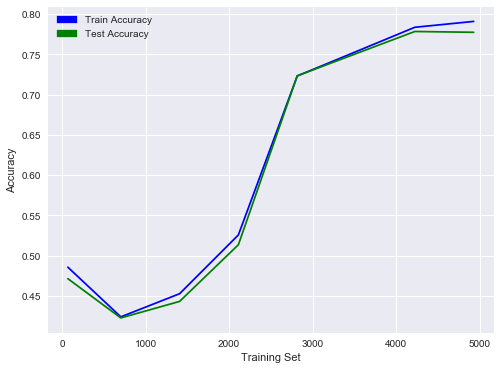

In [24]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(training_set_size, train_acc, color = "blue") 
plt.plot(training_set_size, test_acc, color = "green") 
plt.xlabel("Training Set") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
for train_index, val_index in kf.split(X_train):
    model.fit(X_train[train_index], y_train[train_index],epochs=2,batch_size=128)
    val_acc.append(model.evaluate(X_train[val_index],y_train[val_index],batch_size=128)[1])
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the neural net with Relu activation function is {0:.2f}%".format(accuracy))

Epoch 1/2
5070/5070 [==============================] - 0s 12us/step - loss: 0.4693 - acc: 0.7919
Epoch 2/2
1268/1268 [==============================] - 0s 7us/step
Epoch 1/2
5070/5070 [==============================] - 0s 14us/step - loss: 0.4618 - acc: 0.7864
Epoch 2/2
1268/1268 [==============================] - 0s 12us/step
Epoch 1/2
5070/5070 [==============================] - 0s 17us/step - loss: 0.5039 - acc: 0.7763
Epoch 2/2
1268/1268 [==============================] - 0s 8us/step
Epoch 1/2
5071/5071 [==============================] - 0s 10us/step - loss: 0.4644 - acc: 0.7871
Epoch 2/2
1267/1267 [==============================] - 0s 8us/step
Epoch 1/2
5071/5071 [==============================] - ETA: 0s - loss: 0.4648 - acc: 0.788 - 0s 13us/step - loss: 0.4656 - acc: 0.7880
Epoch 2/2
1267/1267 [==============================] - 0s 7us/step
The accuracy of the neural net with Relu activation function is 78.86%


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
nodes_list=[8,16,32,64,128,256]
train_acc = []
test_acc = []
model = Sequential()
for i in nodes_list:
    model.add(Dense(i, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
4930/4930 [==============================] - 0s 62us/step - loss: 0.6542 - acc: 0.6544
Epoch 2/5
4930/4930 [==============================] - 0s 37us/step - loss: 0.6056 - acc: 0.7406
Epoch 3/5
4930/4930 [==============================] - 0s 36us/step - loss: 0.5906 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 0s 37us/step - loss: 0.5842 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 24us/step
Epoch 1/5
4930/4930 [==============================] - 0s 70us/step - loss: 0.6366 - acc: 0.6762
Epoch 2/5
4930/4930 [==============================] - 0s 48us/step - loss: 0.5820 - acc: 0.7406
Epoch 3/5
4930/4930 [==============================] - 0s 50us/step - loss: 0.5741 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 0s 47us/step - loss: 0.5726 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 30us/step
Epoch 1/5
4930/4930 [==============================] - 0s 88us/step - loss: 0.5988 - acc

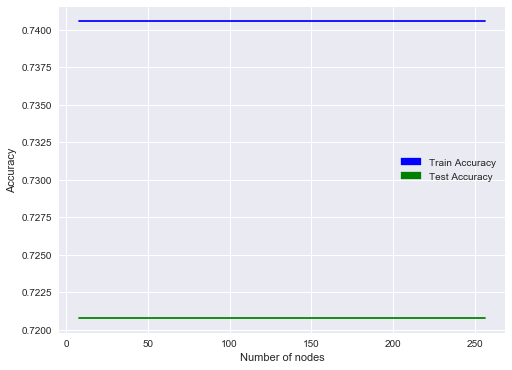

In [27]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(nodes_list, train_acc, color = "blue") 
plt.plot(nodes_list, test_acc, color = "green") 
plt.xlabel("Number of nodes") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
layers_list=[1,2,3,4,5]
train_acc = []
test_acc = []
for i in layers_list:
    model = Sequential()
    for l in range(i):
        model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['acc'])
    model.fit(x_train,y_train,epochs=5)
    train_acc.append(model.evaluate(x_train,y_train)[1])
    test_acc.append(model.evaluate(x_test,y_test)[1])

Epoch 1/5
4930/4930 [==============================] - 0s 93us/step - loss: 0.5993 - acc: 0.7229
Epoch 2/5
4930/4930 [==============================] - 0s 65us/step - loss: 0.5687 - acc: 0.7406
Epoch 3/5
4930/4930 [==============================] - 0s 51us/step - loss: 0.5649 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 0s 54us/step - loss: 0.5612 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 31us/step
Epoch 1/5
4930/4930 [==============================] - 1s 104us/step - loss: 0.5842 - acc: 0.7295
Epoch 2/5
4930/4930 [==============================] - 0s 70us/step - loss: 0.5730 - acc: 0.7406
Epoch 3/5
4930/4930 [==============================] - 0s 62us/step - loss: 0.5729 - acc: 0.7406
Epoch 4/5
4930/4930 [==============================] - 0s 59us/step - loss: 0.5725 - acc: 0.7406
Epoch 5/5
2113/2113 [==============================] - 0s 35us/step
Epoch 1/5
4930/4930 [==============================] - 1s 107us/step - loss: 0.5936 - a

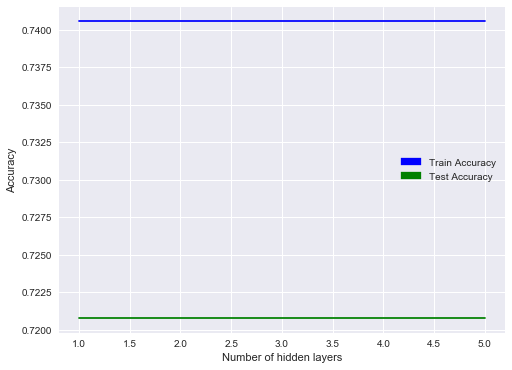

In [29]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(layers_list, train_acc, color = "blue") 
plt.plot(layers_list, test_acc, color = "green") 
plt.xlabel("Number of hidden layers") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=123)
neighbours_list=[1,3,5,7,10,15,17,20,22,25,27,30]
train_acc = []
test_acc = []
for i in neighbours_list:
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(x_train,y_train)
    train_acc.append(knnmodel.score(x_train,y_train))
    test_acc.append(knnmodel.score(x_test,y_test))

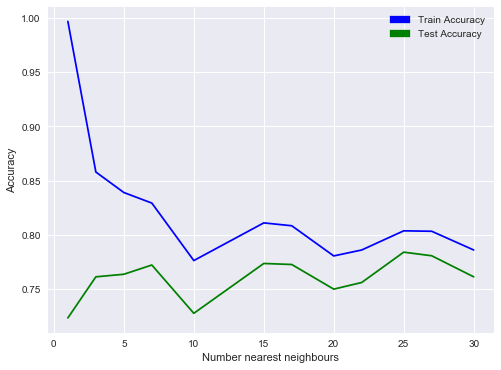

In [31]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
plt.plot(neighbours_list, train_acc, color = "blue") 
plt.plot(neighbours_list, test_acc, color = "green") 
plt.xlabel("Number nearest neighbours") 
plt.ylabel("Accuracy")
trainlegend = mpatches.Patch(color='blue', label='Train Accuracy')
testlegend = mpatches.Patch(color='green', label='Test Accuracy')
plt.legend([trainlegend, testlegend], ['Train Accuracy', 'Test Accuracy'])
plt.show() 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=123)
val_acc = []
kf = KFold(n_splits=5)
knnmodel = KNeighborsClassifier(n_neighbors=25)
for train_index, val_index in kf.split(X_train):
    knnmodel.fit(X_train[train_index], y_train[train_index])
    val_acc.append(knnmodel.score(X_train[val_index],y_train[val_index]))
accuracy = sum(val_acc)/len(val_acc)*100
print("The accuracy of the KNN is {0:.2f}%".format(accuracy))

The accuracy of the KNN is 78.20%
